# **APS - PYTHON PARA CIÊNCIA DE DADOS**

<font size=5> Antonio Coutinho S. C. Ribeiro, Gustavo Luiz Luckmann e Vitor Ibañez Russomano </font>


# **Uma análise do xadrez** 







**<font size=4> 1. INTERESSE GERAL DOS DADOS </font>**

<font size=4> Nos últimos anos, o interesse da população mundial em relação ao xadrez aumentou significativamente. A principal
razão por trás disto foi o lançamento da série "O Gambito da Rainha", na plataforma de streaming Netflix, que foi muito bem
recebida pela mídia e trouxe milhões de novos admiradores ao mundo do xadrez. O estudo "How has The Queen’s Gambit impacted the popularity of online chess?", publicado no site "Towards Data Science", traz evidências para a alavancagem do interesse através do rastreamento de usuários ativos na principal plataforma de xadrez online do mundo (chess.com) no Reino Unido. A primeira figura abaixo mostra a atividade de uma amostra aleatória de usuários ingleses quatro meses antes e quatro meses após o lançamento da série, em 23 de outubro de 2020. Já a segunda, conclui que a atividade desses usuários foi, aproximidamente, 7 vezes maior após o lançamento da série. Por fim, a terceira figura mostra o spike de pesquisas sobre Xadrez após 23/10/2020, através do rastreamento feito pelo Google Trends. Não obstante, mais recentemente, a grande polêmica envolvendo as suspeitas de trapaça por parte do jogador americano, Hans Niemann, voltou a atenção da mídia mundial para o assunto, o que também influenciou positivamente o interesse público pelo jogo. Desde então, muitos pesquisadores e estatísticos vêm utilizando as largas bases de dados de partidas de xadrez, com o intuito de encontrar padrões e auxiliar na detecção de trapaças.
  </font>

<img src="https://miro.medium.com/max/1400/1*dUmxbWF-5VAaq2GkjpFZlg.png" width="600px"/>


<img src="https://miro.medium.com/max/828/1*5UuAsd6w5e1u2tj6wdW4cQ.png" width="600px"/>


<img src="https://images.chesscomfiles.com/uploads/v1/images_users/tiny_mce/erik/phpGkaV2n.png" width="600px"/>


<font size=4> **2. INTRODUÇÃO**</font>

<font size=4>No contexto do crescimento explosivo do interesse público pelo jogo, este estudo se concentra em explorar a riqueza da base disponibilizada pela maior entidade do xadrez mundial, FIDE. A partir dela, muitas coisas interessantes podem ser feitas, como a comparação de resultados entre jogadores de diferentes níveis, a influência da cor das peças nos resultados observados, e até uma analise mais minuciosa das partidas, separadas por cada movimento de peça. Também vale lembrar que o desenvolvimento do poder computacional nas últimas décadas permitiu o treinamento de inteligências artificiais voltadas ao xadrez, as quais passaram a exercer grande influência em diversos campos do jogo atualmente, contribuindo, inclusive, para a elaboração de pesquisas sobre o tema.

<font size=4>**3. CONSIDERAÇÕES INICIAIS**

<font size=4>**3.1. CÓDIGO BÁSICO**

<font size=4>Antes de iniciar o trabalho com os dados, é necessário importar as bibliotecas necessárias e realizar a leitura da base de dados, via pandas, como mostram as linhas de código abaixo.</font>

In [2]:
#!pip3 install --upgrade tensorflow-gpu --user
#!pip install plotnine 

!pip install numpy
!pip install plotnine
!pip install ast

import numpy
import pandas
from plotnine import *
from ast import literal_eval

data = pandas.read_csv(
r"C:\Users\Vitor Russomano\VsCodeProjects\Notes\APS - DataScience Py\10411_games_with_centipawn_metrics.csv"
)
data = data.drop(
    ["Unnamed: 0", "White Expected Rating by ACPL", "Black Expected Rating by ACPL"],
    axis=1,
)

You should consider upgrading via the 'C:\Users\Vitor Russomano\flask-api\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Vitor Russomano\flask-api\venv\Scripts\python.exe -m pip install --upgrade pip' command.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Vitor Russomano\AppData\Local\Temp\pip-install-mucfmcen\ast_a3d3c91595904cf0b244933ceb26d944\setup.py", line 6, in <module>
          README = codecs.open(os.path.join(here, 'AST/README'), encoding='utf8').read()
        File "C:\Users\Vitor Russomano\AppData\Local\Programs\Python\Python310\lib\codecs.py", line 905, in open
          file = builtins.open(filename, mode, buffering)
      FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Vitor Russomano\\AppData\\Local\\Temp\\pip-install-mucfmcen\\ast_a3d3c91595904cf0b244933ceb26d94

  Using cached AST-0.0.2.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


<font size=4>**3.2. DEFINIÇÕES BÁSICAS**

<font size=4>Como se sabe, o Xadrez é disputado em um tabuleiro (de dimensão 8x8, ou seja, com 64 casas) entre duas pessoas. Cada jogador inicia a partida com 16 peças, as quais reproduzem movimentos variados, e são distinguidas pela cor. Mais especificamente, um deles representa as brancas, começando com oito "peões", duas "torres", dois "cavalos", dois "bispos", uma "dama" e um "rei", enquanto o outro possui as mesmas peças, porém de cor preta. Ademais, o jogador de brancas é responsável por realizar o primeiro lance. 

<font size=4>Além disso, os jogadores são classificados de acordo com um sistema denominado "Rating Elo", definido por meio de uma metodologia estatística responsável por determinar a força relativa entre eles. Neste caso, utilizou-se algumas nomenclaturas padrões para segmentar os jogadores de acordo com as faixas de rating, sendo considerados "Super Grande Mestres", por exemplo, aqueles que possuem o rating maior ou igual a 2700. Parte relevante do estudo será orientada por estas segmentações, as quais podem ser vistas em sua totalidade na tabela abaixo.

In [3]:
table = {
    "Titulação": [
        "Super Grande Mestre",
        "Grande Mestre",
        "Mestre Internacional",
        "Mestre FIDE",
        "Candidato a Mestre FIDE",
        "Jogador Médio",
        "Jogador Iniciante",
    ],
    "ELO": ["2700+", "2500+", "2400-2499", "2300-2399", "2200-2299","1200-2199", "<1200"],
}

table = pandas.DataFrame.from_dict(table)

count = (
    pandas.cut(
        pandas.concat([data["White ELO"], data["Black ELO"]]),
        [0, 1200, 2200, 2300, 2400, 2500, 2700, 4000],
        labels=[
        "Jogador Iniciante",
        "Jogador Médio",
        "Candidato a Mestre FIDE",
        "Mestre FIDE",
        "Mestre Internacional",
        "Grande Mestre",
        "Super Grande Mestre",
        ],
    )
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Titulação", 0: "Número de Jogos"})
)

pandas.merge(table, count)

,Titulação,ELO,Número de Jogos
0,Super Grande Mestre,2700+,4661
1,Grande Mestre,2500+,8303
2,Mestre Internacional,2400-2499,3417
3,Mestre FIDE,2300-2399,1742
4,Candidato a Mestre FIDE,2200-2299,1189
5,Jogador Médio,1200-2199,1479
6,Jogador Iniciante,<1200,31


<font size=4>**4. INFLUÊNCIA DA COR, RATING E TITULAÇÃO**

<font size=4>Dadas essas definições iniciais, podem surgir dúvidas a respeito, por exemplo, sobre a influência da cor das peças ou da força relativa entre os jogadores no resultado de uma partida. Alguns desses fatores serão discutidos nos próximos subitens.


<font size=4>**4.1. DESEMPENHO POR COR**    

<font size=4>Primeiramente, é interessante analisar algumas métricas relativas à influência da cor das peças no desempenho dos jogadores. Uma abordagem inicial se resume em calcular o percentual geral das partidas em que os jogadores de brancas ou pretas saíram com a vitória, bem como a parcela de empates. De acordo com os dados disponíveis, em 35.3348% dos confrontos houve vitória das brancas (representado na tabela abaixo como "1-0"), enquanto 23.8832% deles foram ganhos pelas pretas ("0-1") e os 40.7820% restantes terminaram em empate.
    
Este resultado não surpreende, tendo em vista que ao longo das últimas décadas, sobretudo após a introdução de computadores nos estudos de Xadrez, o jogo evoluiu para um patamar em que uma parte relevante dos jogadores profissionais dominam as teorias e linhas que levam a posições de empate. Além disso, a vantagem de 11.45 pontos percentuais das brancas em relação às pretas é intuitiva, já que todas partidas se iniciam com um movimento do lado branco. Isso significa que, apesar de existir uma tendência ao empate, as brancas possuem uma pequena vantagem, pois o jogador pode "ditar" a dinâmica inicial do jogo, escolhendo seu padrão de abertura preferido e restringindo a gama de possibilidades de movimentos satisfatórios do seu adversário.

In [4]:
data = data[data["Result"] != "*"]
table = data["Result"].value_counts() / data["Result"].count()
print(table)

1/2-1/2    0.407820
1-0        0.353348
0-1        0.238832
Name: Result, dtype: float64


<font size=4>**4.2. DESEMPENHO POR COR E TITULAÇÃO** 

<font size=4>**4.2.1. ANÁLISE GERAL** 

<font size=4>É importante enfatizar que os argumentos citados anteriormente têm maior apelo quando se trata de jogadores profissionais titulados como "Mestres Internacionais" (ou superior), sendo o requisito obrigatório atingir 2400 pontos de Rating Elo no ranking da FIDE para obter esta titulação. No entanto, por haver um volume muito maior de partidas relacionadas aos Mestres Internacionais, Grande Mestres e Super Grande Mestres, aquela tendência observada na tabela foi predominante. Quanto aos jogadores não titulados ou médios, os empates podem ser menos frequentes, devido à menor experiência e conhecimento sobre as teorias do esporte. Isso pode ser evidenciado a partir do gráfico abaixo, que mostra percentual dos empates, vitórias e derrotas das peças brancas para cada classificação de Rating Elo.
    
<font size=4>Percebe-se que a frequência de empates ("1/2-1/2") aumenta junto com a classificação dos jogadores, assim como a vantagem das brancas ("1-0") sobre as pretas ("0-1"). Além disso, os "Mestres Internacionais" e os "Mestres FIDE" apresentam grande equilíbrio nos resultados, com ocorrências próximas de 30% para cada métrica. Finalmente, os jogadores não titulados ("Jogador Médio" no gráfico) possuem uma taxa de empates ínfima, devido aos fatores explicados no parágrafo anterior, além de um volume muito maior de derrotas do que vitórias com as peças brancas.
    
<font size=2>_Obs: o intuito deste gráfico não é analisar os confrontos de forma segmentada, e sim agrupar os resultados observados para cada classificação de rating, em termos percentuais. Em outras palavras, o objetivo não é olhar para o confronto direto entre jogadores sem titulação, por exemplo, e sim para o desempenho geral deste grupo. Também vale mencionar que o grupo "Jogador Iniciante" foi retirado da análise, pois possui apenas 31 dados disponíveis._

In [1]:
data[["Brancas", "Pretas"]] = data[["White ELO", "Black ELO"]].apply(
    lambda x: pandas.cut(
        x,
        [0, 1200, 2200, 2300, 2400, 2500, 2700, 4000],
        labels=[
        "Jogador Iniciante",
        "Jogador Médio",
        "Candidato a Mestre FIDE",
        "Mestre FIDE",
        "Mestre Internacional",
        "Grande Mestre",
        "Super Grande Mestre",
        ],
    ),
    axis=0,
)



data.query('`Brancas`!= "Jogador Iniciante" &  `Pretas` != "Jogador Iniciante"').groupby(
    ["Brancas", "Result"]
).size().fillna(0)

NameError: name 'data' is not defined

<font size=4>**4.2.2. ANÁLISE SEGMENTADA** 

<font size=4>Para entender melhor a influência da cor das peças e da titulação no desempenho dos atletas, é necessário realizar uma análise mais detalhada, segmentando os confrontos de cada grupo de jogadores entre rivais de mesmo nível ou nível diferente. Isso pode ser feito atráves da tabela abaixo.
    
<font size=4>De acordo com ela, quando jogadores "fortes" enfrentam um oponente com a mesma classificação há uma ocorrência predominante de empates, além de uma vantagem das peças brancas sobre as pretas, o que pode ser observado analisando os resultados de "Super Grande Mestres" contra "Super Grande Mestres" (1010 empates, 428 vitórias e 226 derrotas das brancas) ou "Grande Mestres" contra "Grande Mestres" (1095 empates, 624 vitórias e 395 derrotas das brancas). Já quando há uma diferença de nível entre os jogadores, aqueles com classificação mais alta tendem a vencer mais- especialmente quando jogam de brancas, e a frequência de empates deixa de ser predominante. Isso pode ser detectado, por exemplo, nas partidas de "Super Grande Mestres" contra "Grande Mestres", em que o primeiro grupo joga de brancas (241 empates, 298 vitórias e 47 derrotas). Além disso, quando jogadores de titulações inferiores enfrentam um oponente de mesmo nível, não há um padrão tão explícito (em partes devido ao volume mais baixo de observações), apesar de o jogador de brancas levar uma vantagem marginal. Nota-se, por exemplo, o equilíbrio nas partidas entre "Candidatos a Mestre FIDE" (15 empates, 29 vitórias e 20 derrotas das brancas). Por fim, a última observação relevante é sobre as partidas realizadas entre jogadores não titulados, nas quais a frequência de empates é baixíssima e o detentor das peças brancas leva vantagem absoluta, como ocorre quando os "Jogadores Médios" se enfrentam (36 empates, 66 vitórias das pretas e 109 triunfos das brancas).

<font size=4>Portanto, resumidamente, essa análise adicional permite identificar que a força relativa dos jogadores exerce uma grande influência sobre os resultados das partidas. Além disso, reitera-se a predominância de empates quando dois profissionais muito fortes (e de mesmo nível) se enfrentam, e menor padronização dos resultados quando dois jogadores inferiormente titulados  (e de mesmo nível) competem. Por último, o menor domínio sobre o jogo torna a partida mais desiquilibrada em favor das brancas no caso dos enxadristas não titulados. Mas, como visto no subitem anterior, esse grupo tem muito mais derrotas do que vitórias com as peças brancas, e isso pode ser explicado pelo fato de que eles enfrentam predominantemente adversários mais fortes (o confronto direto entre eles é muito mais raro).

In [13]:


data[["Brancas", "Pretas", "Result"]]
data.groupby(["Brancas", "Pretas"])["Result"].value_counts().unstack().fillna(
    0
)

Result                                             0-1    1-0  1/2-1/2
Brancas                 Pretas                                        
Jogador Iniciante       Jogador Iniciante          1.0    1.0      0.0
                        Jogador Médio              6.0    0.0      0.0
Jogador Médio           Jogador Iniciante          0.0    2.0      0.0
                        Jogador Médio             66.0  109.0     36.0
                        Candidato a Mestre FIDE   50.0   21.0     29.0
                        Mestre FIDE               65.0   11.0     26.0
                        Mestre Internacional     104.0   10.0     21.0
                        Grande Mestre            130.0    4.0     13.0
                        Super Grande Mestre        4.0    0.0      0.0
Candidato a Mestre FIDE Jogador Médio             15.0   65.0     21.0
                        Candidato a Mestre FIDE   20.0   29.0     15.0
                        Mestre FIDE               35.0   21.0     22.0
                        Mestre Internacional     101.0   22.0     50.0
                        Grande Mestre            102.0   15.0     34.0
                        Super Grande Mestre        6.0    0.0      0.0
Mestre FIDE             Jogador Médio              7.0   92.0     27.0
                        Candidato a Mestre FIDE   18.0   55.0     22.0
                        Mestre FIDE               15.0   33.0     29.0
                        Mestre Internacional      92.0   48.0     76.0
                        Grande Mestre            186.0   29.0    114.0
                        Super Grande Mestre       23.0    2.0      3.0
Mestre Internacional    Jogador Médio              2.0  127.0      7.0
                        Candidato a Mestre FIDE   16.0  114.0     35.0
                        Mestre FIDE               31.0  124.0     69.0
                        Mestre Internacional      83.0  105.0    168.0
                        Grande Mestre            306.0  135.0    347.0
                        Super Grande Mestre       38.0    4.0     14.0
Grande Mestre           Jogador Iniciante          0.0   16.0      3.0
                        Jogador Médio              3.0  166.0     16.0
                        Candidato a Mestre FIDE    6.0  159.0     22.0
                        Mestre FIDE               22.0  263.0     79.0
                        Mestre Internacional      74.0  389.0    297.0
                        Grande Mestre            395.0  624.0   1095.0
                        Super Grande Mestre      189.0   75.0    292.0
Super Grande Mestre     Jogador Médio              0.0   12.0      1.0
                        Candidato a Mestre FIDE    0.0    5.0      0.0
                        Mestre FIDE                0.0   24.0      2.0
                        Mestre Internacional       2.0   41.0      9.0
                        Grande Mestre             47.0  298.0    241.0
                        Super Grande Mestre      226.0  428.0   1010.0

<font size=4>A penúltima ilustração dessa seção é um conjunto de gráficos de barras da média geral dos resultados para cada classificação, que permite comparar o que ocorreu em cada possibilidade de enfrentamento (por exemplo, "Mestre FIDE vs Mestre FIDE" e "Mestre FIDE vs Grande Mestre"). Contudo, diferente das análises anteriores, não há separação entre empate, vitória e derrota. Toda vez que um jogador empata uma partida com as peças brancas ele ganha 0.5 ponto, enquanto a vitória lhe confere 1 ponto, e a derrota 0. Assim, o cálculo da média retorna a razão entre os pontos efetivamente adquiridos e a pontuação total disputada, por exemplo: Os jogadores Médios (brancas) enfrentaram  os Jogadores Iniciantes (pretas) 4 vezes, empatando 2 partidas, vencendo 1 e perdendo 1; portanto, conquistaram 2 pontos de 4 possíveis, o que equivale a 50% dos pontos totais (mesmo valor da média calculada).
    
Aqui fica ainda mais explícita a influência da força relativa dos jogadores nas vitórias, o que indica que o sistema de titulação da FIDE funciona muito bem. A frequência de resultados positivos é maior, em praticamente 100% dos casos, quando um jogador de um nível superior enfrenta outro inferior, e passa a cair à medida que o nível do seu oponente aumenta.

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 9 rows containing missing values.


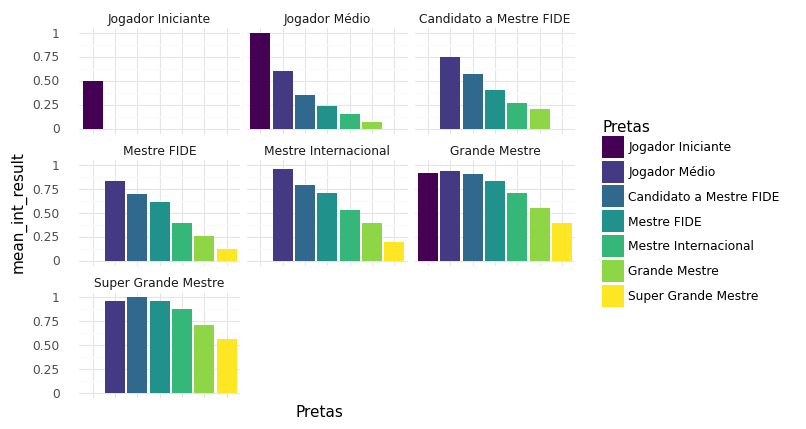

<ggplot: (193995199492)>

In [14]:
data.assign(
    integer_result=lambda _: _.Result.replace({"1-0": 1, "1/2-1/2": 0.5, "0-1": 0})
).groupby(["Brancas", "Pretas"]).agg(
    mean_int_result=("integer_result", "mean")
).reset_index().pipe(
    lambda _: ggplot(_, aes(x="Pretas", y="mean_int_result", fill="Pretas"))
    + geom_col()
    + facet_wrap("Brancas")
    + theme_minimal()
    + theme(axis_text_x=element_blank())
)

<font size=4>Também é possível aplicar a análise anterior para o caso em que cada grupo de enxadristas utiliza as peças pretas e enfrenta a outra cor. Nota-se, a partir do gráfico abaixo, que a conclusão é a mesma: A razão dos pontos conquistados é maior quando um jogador de um nível superior enfrenta outro inferior, e passa a cair à medida que o nível do seu oponente aumenta.

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 9 rows containing missing values.


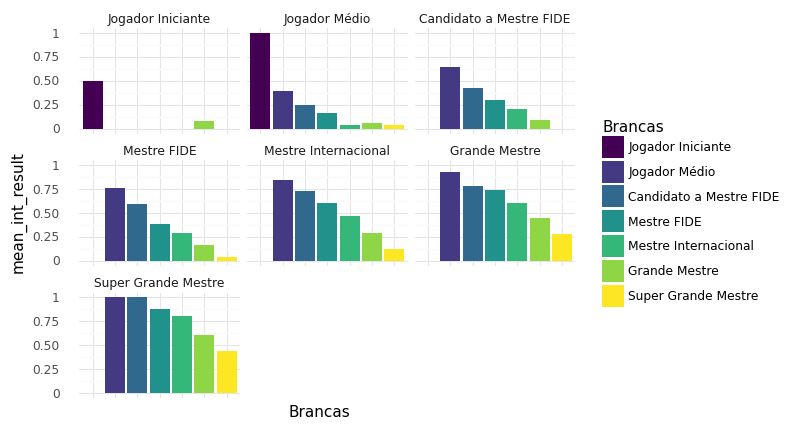

<ggplot: (193994543342)>

In [15]:
data.assign(
    integer_result=lambda _: _.Result.replace({"1-0": 0, "1/2-1/2": 0.5, "0-1": 1})
).groupby(["Pretas", "Brancas"]).agg(
    mean_int_result=("integer_result", "mean")
).reset_index().pipe(
    lambda _: ggplot(_, aes(x="Brancas", y="mean_int_result", fill="Brancas"))
    + geom_col()
    + facet_wrap("Pretas")
    + theme_minimal()
    + theme(axis_text_x=element_blank())
)

<font size=4>**4.3. DESEMPENHO POR COR E RATING ELO** 

<font size=4>Adicionalmente, o gráfico abaixo expressa a influência das diferenças de rating elo e cor das peças nas vitórias. Nos confrontos em que a diferença é muito grande, na casa dos 1000 pontos, há praticamente 100% dos pontos conquistados para o lado maior rankeado. Ademais, à medida que a diferença se atenua, esse percentual cai, sendo que o equilíbrio é muito próximo do empate em 50% dos pontos conquistados para cada cor quando não há divergências significativas de rating (com uma pequena vantagem a favor do melhor rankeado).
    
<font size=4>Portanto, além de o estudo indicar que o sistema de titulação da FIDE cumpre seu dever, há evidências para dizer que o sistema de Rating Elo funciona muito bem.
    
<font size=2>_Obs: essas inferências são semelhantes e complementares, mas há uma diferença sútil entre elas, já que o cálculo do Rating Elo independe da titulação, e há jogadores com diferentes níveis de Rating dentro de uma mesma titulação._

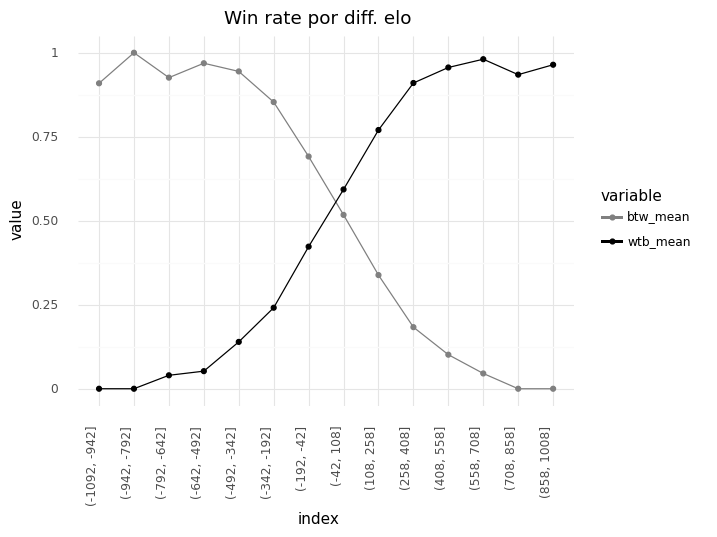

<ggplot: (193957372208)>

In [16]:
data = data.rename(columns={"White ELO": "white_elo", "Black ELO": "black_elo"}).assign(
    wtbdiff=lambda _: _.white_elo - _.black_elo,
    btwdiff=lambda _: _.black_elo - _.white_elo,
)

bins = numpy.arange(data["wtbdiff"].min(), data["btwdiff"].max(), 150)
pandas.merge(
    data.assign(
        binned_btw=lambda _: pandas.cut(_.btwdiff, bins=bins),
        integer_result=lambda _: _.Result.replace({"1-0": 1, "1/2-1/2": 0.5, "0-1": 0}),
    )
    .groupby("binned_btw")
    .agg(btw_mean=("integer_result", numpy.mean))
    .dropna(),
    data.assign(
        binned_wtb=lambda _: pandas.cut(_.wtbdiff, bins=bins),
        integer_result=lambda _: _.Result.replace({"1-0": 1, "1/2-1/2": 0.5, "0-1": 0}),
    )
    .groupby("binned_wtb")
    .agg(wtb_mean=("integer_result", numpy.mean))
    .dropna(),
    left_index=True,
    right_index=True,
).reset_index().melt(id_vars="index", value_vars=["btw_mean", "wtb_mean"]).pipe(
    lambda _: ggplot(_)
    + geom_line(aes(x="index", y="value", group="variable", colour="variable"))
    + geom_point(aes(x="index", y="value", group="variable", colour="variable"))
    + scale_color_manual(["grey", "black"])
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=90, hjust=1))
    + labs(title="Win rate por diff. elo")
)

<font size=4>**5. MOVIMENTO DE PEÇAS NO XADREZ**

<font size=4>A partir de agora, o estudo será concentrado em uma análise mais detalhada e minuciosa em relação ao que foi discutido na seção de medidas iniciais, pois o foco deixa de ser apenas os resultados das partidas como um todo e passa a ser os movimentos de peças realizados pelos jogadores.

<font size=4>**5.1. PADRÕES DE MOVIMENTO**

<font size=4>**5.1.1. ANÁLISE GLOBAL**

<font size=4>Uma partida de xadrez é dotada de uma imensidão impressionante de eventos, tendo em vista que ela faz parte de uma combinação de 900^40 possíveis jogos, dependendo dos movimentos das peças. Contudo, ainda que não existam limites com relação a quantidade de lances realizados, ela é sempre controlada pelo tempo, que varia de acordo com as especificidades de cada torneio. Por isso, mesmo que indiretamente, há uma restrição natural dentro de uma partida imposta sobre os movimentos dos enxadristas, o que possibilita a identificação de padrões.
    
A figura abaixo mostra a densidade da distribuição de lances das partidas presentes na base. É possível observar que a maior parte delas tem duração de, aproximadamente, 40 lances. Com relação às extremidades, é muito raro acontecer jogos com menos de 10 movimentos, já que os jogadores geralmente possuem o relógio à seu favor e nesse ponto a chance de cometer erros ou entrar em uma posição perdedora é muito pequena. Além disso, a ocorrência de partidas com mais de 80 lances é infima, muito por conta das restrições de tempo impostas e pelo aumento da probabilidade de cometer erros definidores.

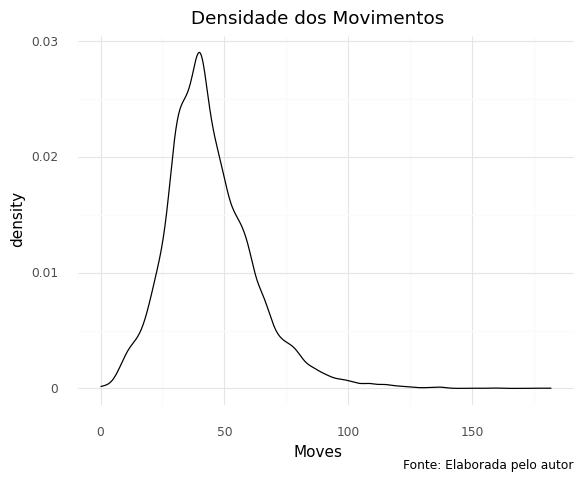

<ggplot: (193996931205)>

In [17]:
(
    ggplot(data, aes(x="Moves"))
    + geom_density(alpha=0.1)
    + theme_minimal()
    + labs(title="Densidade dos Movimentos", caption="Fonte: Elaborada pelo autor")
)

<font size=4>**5.1.2. ANÁLISE POR TITULAÇÃO**

<font size=4>Não obstante, separando os jogadores de acordo com as titulações, observa-se que a lógica se mantém na maioria dos casos. De acordo com os boxplots printados abaixo, é nítido que a mediana do número de movimentos dentro de uma partida é muito próxima de 40. A excessão se dá no nível "Iniciante", em que a mediana é muito menor (em torno de 25), fato que pode ter relação com o maior número de erros e imprecisões dos jogadores mais fracos, levando ao término precoce da partida.

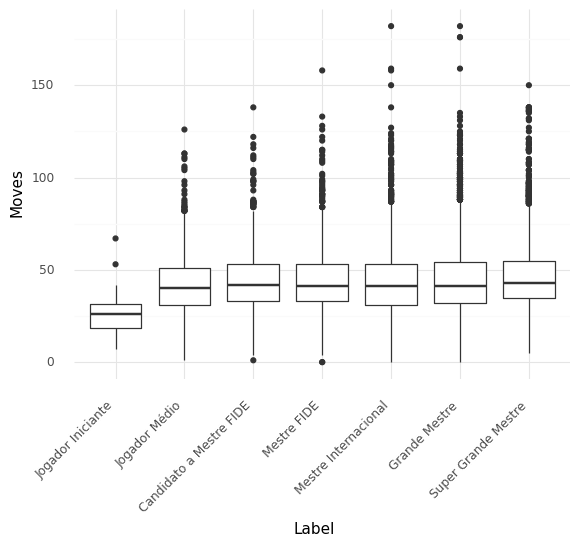

<ggplot: (193996972008)>

In [18]:
(
    ggplot(
        pandas.concat(
            [
                data[["Brancas", "Moves"]].rename(columns={"Brancas": "Label"}),
                data[["Pretas", "Moves"]].rename(columns={"Pretas": "Label"}),
            ]
        )
    )
    + geom_boxplot(aes(x="Label", y="Moves"))
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

<font size=4>**6. XADREZ E OS COMPUTADORES**

<font size=4>**6.1. IMPORTÂNCIA DOS COMPUTADORES**

<font size=4>O xadrez mudou muito ao longo das últimas décadas, sobretudo após o surgimento dos computadores em meados do século XX. Isso permitiu a elaboração de diversos programas capazes de jogar xadrez (engines), respondendo, inclusive, a movimentos humanos. Atualmente, as engines já alcançaram níveis de excelência, a ponto de serem completamente invencíveis quando comparadas aos jogadores profissionais. Dessa forma, a simbiose entre os enxadristas e os computadores se tornou imprescindível, pois a máquina pode auxiliar de diversas maneiras, tais como: oferecer avaliações das posições e indicar os melhores lances de acordo com a "visão" da engine; apontar os erros cometidos e o que poderia ter sido feito para evitá-los; ajudar na preparação dos jogadores para as partidas, aliando o poder computacional e a criatividade humana com o intuito de surpreender os adversários.

<font size=4>**6.2. AVALIAÇÃO DAS ENGINES**

<font size=4>Grande parte da relação entre as máquinas e os jogadores é sustentada pela avaliação das "engines". Basicamente, ela serve para mensurar a igualdade ou a vantagem de um jogador sobre o outro em uma determinada posição. Nesse cálculo está incluso tanto o valor das peças presentes no tabuleiro, quanto o valor estimado do impacto de possíveis desdobramentos futuros. Não é necessário entrar em todos os detalhes de uma avaliação como essa, mas o seguinte exemplo pode ajudar a entender como ela funciona: Em condições normais uma peça como o peão possui o valor de uma unidade. Já a torre, equivale a cinco unidades, ou cinco peões. Dessa forma, desconsiderando todas as possibilidades futuras e nuances de uma certa posição, se um jogador se encontra com uma torre a mais e joga de brancas, a avaliação da engine seria algo como "+5". Já se outro jogador joga de pretas e possui um peão a mais, esse número seria igual a "-1".

<font size=4>**6.2.1. EXEMPLO APLICADO EM UM JOGO**

<font size=4>O gráfico abaixo ilustra a avaliação de um determinado jogo extraído da base de dados, pela principal engine utilizada hoje (stockfish). Percebe-se que o jogador de brancas se manteve em vantagem ao longo de quase toda a partida, chegou a ficar em leve desvantagem ao final dela, até que ambos acordaram em empate próximo ao lance de número 60.

<font size=2>_Obs: o conceito de "profundidade", presente no gráfico, é muito parecido com o de "movimento". A diferença entre eles é que a profundidade não distingue cor de peça, ou seja, dizer que o jogo está na profundidade 4 significa que cada cor realizou 2 movimentos._

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 17 rows containing missing values.


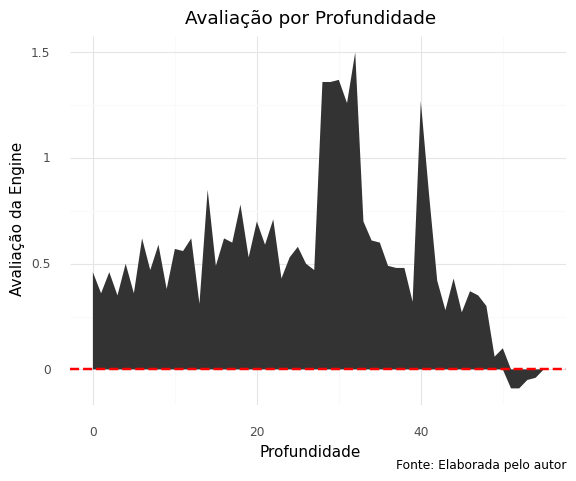

<ggplot: (193996855999)>

In [19]:
evaluation = data.copy()
evaluation["Evaluations List"] = data["Evaluations List"].apply(literal_eval)

evaluation = (
    evaluation.explode("Evaluations List")
    .reset_index()
    .rename(columns={"index": "game_number"})
)
evaluation["Profundidade"] = evaluation.groupby("game_number")["game_number"].transform(
    "cumcount"
)

evaluation["Avaliação da Engine"] = pandas.to_numeric(
    evaluation["Evaluations List"].div(100)
)
(
    evaluation.query("game_number==1").pipe(
        lambda _: (
            ggplot(_, aes(x="Profundidade", y="Avaliação da Engine", group=1)) + geom_area()
        )
        + geom_hline(yintercept=0, linetype="dashed", color="red", size=1)
        + labs(title="Avaliação por Profundidade", caption="Fonte: Elaborada pelo autor")
        + theme_minimal()
        + xlim(0, 55)
    )
)

<font size=4>**6.2.2. EXTRAPOLANDO PARA O RESTO DA BASE**

<font size=4>Também é possível extrapolar o exemplo anterior para o restante da base, na tentativa de identificar padrões relevantes. A primeira forma de fazer isso é por meio do cálculo da avaliação média por lance, considerando inicialmente todas as partidas juntas (sem distinção dos jogadores por titulação). Na figura seguinte, fica nítida a vantagem das peças brancas, já que a média é sempre positiva. Além disso, essa vantagem parece aumentar junto ao aumento do número de lances em um jogo. No entanto, é importante destacar que o pico da avaliação média é próximo a 0.75 pontos, o que não é algo totalmente decisivo em uma partida (equivale a menos de um peão de vantagem). Isso significa dizer que há um pequeno benefício em realizar o primeiro lance, que em média se traduz em vantagens ao longo da partida, mas não a ponto de tornar o jogo injusto.

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 253 rows containing missing values.


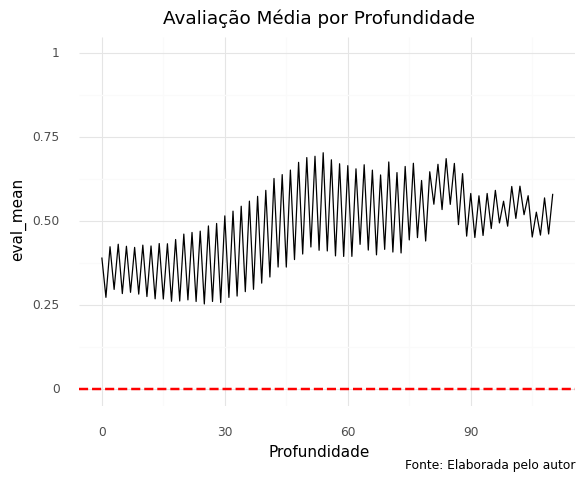

<ggplot: (193997083636)>

In [20]:
(
    evaluation.groupby("Profundidade", as_index=False)
    .agg(
        eval_mean=("Avaliação da Engine", numpy.mean),
        eval_std=("Avaliação da Engine", numpy.std),
    )
    .pipe(
        lambda _: (
            (ggplot(_, aes(x="Profundidade", y="eval_mean", group=1)) + geom_line())
            + geom_hline(yintercept=0, linetype="dashed", color="red", size=1)
            + theme_minimal()
            + labs(
                title="Avaliação Média por Profundidade", caption="Fonte: Elaborada pelo autor"
            )
            + xlim(0, 110)
            + ylim(0, 1)
        )
    )
)

<font size=4>O desvio padrão também é uma métrica importante, pois permite mensurar a consistência dos jogadores ao longo de uma partida. Nesse caso, a consistência pode ser entendida como a capacidade dos enxadristas realizarem movimentos bons de acordo com a avaliação da engine. Aqui, os dados mostram um padrão muito claro: à medida em que a partida se estende e as posições ficam mais complexas, os seres-humanos destoam cada vez mais dos computadores. Em outras palavras, a suscetibilidade a erros e imprecisões cresce ao longo de uma partida, fato que pode ser evidenciado pelo gráfico abaixo.

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 253 rows containing missing values.


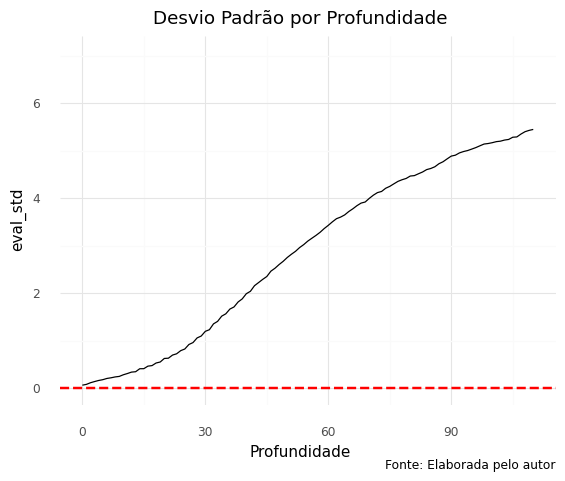

<ggplot: (194002305874)>

In [21]:
(
    evaluation.groupby("Profundidade", as_index=False)
    .agg(
        eval_mean=("Avaliação da Engine", numpy.mean),
        eval_std=("Avaliação da Engine", numpy.std),
    )
.pipe(
        lambda _: (
            (ggplot(_, aes(x="Profundidade", y="eval_std", group=1)) + geom_line())
            + geom_hline(yintercept=0, linetype="dashed", color="red", size=1)
            + theme_minimal()
            + labs(
                title="Desvio Padrão por Profundidade",
                caption="Fonte: Elaborada pelo autor",
            )
            + xlim(0, 110)
        )
    )
)

<font size=4>**7. CENTIPAWN LOSS, RATING E TITULAÇÃO**

<font size=4>**7.1. CONCEITO DE CENTIPAWN LOSS**

<font size=4> O Centipawn Loss deriva da avaliação das posições pelos computadores, então seu entendimento não muda muito com relação ao que foi explicado anteriormente. O termo Centipawn se refere a uma unidade de medida que equivale a um centésimo de peão, ou seja, como o peão vale 1 ponto, o Centipawn vale 1/100. Já o termo Centipawn Loss (ou perda por centésimo de peão), representa a deterioração da posição quando são realizados movimentos piores do que aqueles ditos como o melhor pela engine. Portanto, isso pode ser utilizado, por exemplo, para medir a qualidade de um jogador em um determinado jogo, já que quanto menor for o centipawn loss por lance, mais forte foram as suas jogadas.

<font size=4>**7.2. INDICADOR DE PRECISÃO**

<font size=4>Ora, se o Centipawn Loss é uma proxy para mensurar a qualidade de um jogo, é intuitivo imaginar que exista alguma relação muito clara entre essa medida e o Rating Elo (força relativa) dos jogadores. Para checar isso, foi feito um gráfico de dispersão entre o Centipawn Loss médio por partida de cada jogador e seu respectivo Rating Elo, que pode ser visto depois da linha de código abaixo.
    
<font size=4>Ele permite identificar uma tendência negativa forte, especialmente após o nível de 2200 pontos de rating, indicando que os jogadores mais fortes são aqueles com as menores perdas de "centepões" por partida. Outro ponto interessante a se destacar, é que a partir dos 2500 pontos de Rating não já nenhum jogador com o Centipawn Loss médio acima de 40, ou seja, esse parece ser um fator importante para um profissional alcançar o título de Grande Mestre.
  
<font size=2>_Obs: o principal motivo para a correlação ser mais forte após os 2200 pontos, é o fato de a base de dados possuir um volume muito maior de jogos relacionados a esses enxadristas (vide tabela da seção "3. Definições Iniciais"), o que torna o cálculo da média mais confiável. Um jogador médio pode ter apenas um jogo na base, por exemplo, no qual seu CP Loss foi baixo por algum motivo qualquer, como o adversário cometer um erro grave e a partida acabar rápido._

In [22]:
data["CP Loss Brancas"] = data["White CP Loss List"].apply(literal_eval)
data["CP Loss Pretas"] = data["Black CP Loss List"].apply(literal_eval)

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


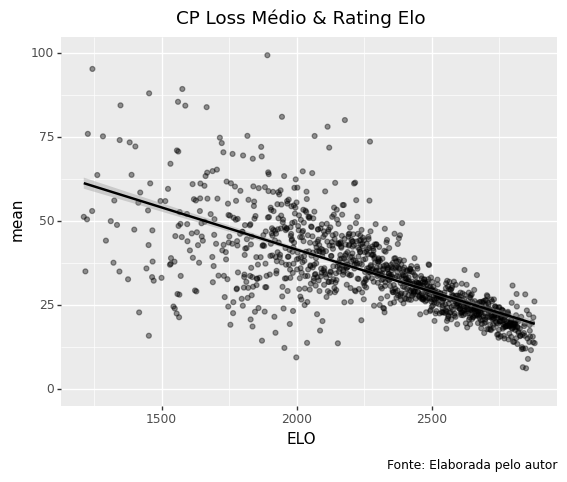

<ggplot: (193996796268)>

In [23]:
long_cp = pandas.concat(
    [
        (
            data.filter(["CP Loss Brancas", "Brancas", "white_elo"])
            .melt(
                id_vars=["Brancas", "white_elo"],
                value_vars=["CP Loss Brancas"],
            )
            .rename(columns={"Brancas": "Label", "white_elo": "ELO"})
            .explode("value")
        ),
        (
            data.filter(["CP Loss Pretas", "Pretas", "black_elo"])
            .melt(
                id_vars=["Pretas", "black_elo"],
                value_vars=["CP Loss Pretas"],
            )
            .rename(columns={"Pretas": "Label", "black_elo": "ELO"})
            .explode("value")
        ),
    ]
)


long_cp.query('Label != "Jogador Iniciante"').groupby("ELO").agg(
    var=("value", numpy.std), mean=("value", numpy.mean)
).reset_index().pipe(
    lambda _: ggplot(_, aes(x="ELO", y="mean"))
    + geom_point(alpha=0.4)
    + geom_smooth()
    + labs(
                title="CP Loss Médio & Rating Elo",
                caption="Fonte: Elaborada pelo autor",
            )
    + ylim(0, 100)
)

<font size=4>**7.3. INDICADOR DE CONSISTÊNCIA**

<font size=4>Também é interessante repetir o exercício da dispersão utilizando o desvio padrão do Centipawn Loss de cada jogador, invés da média. Nesse caso, o desvio padrão indica a consistência dos enxadristas, ou seja, permite identificar se eles possuem muitos altos e baixos ou são precisos na maior parte dos lances.

A figura abaixo é muito parecida com a anterior, pois também expressa uma correlação negativa entre as variáveis. Nota-se que há evidências para argumentar que o ganho de rating dos jogadores está relacionado com o ganho de consistência (desvio padrão menor) em seus lances.

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


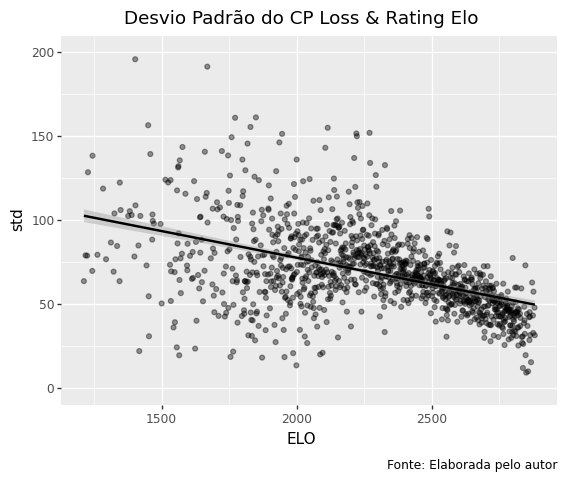

<ggplot: (193957372358)>

In [24]:

long_cp.query('Label != "Jogador Iniciante"').groupby("ELO").agg(
    std=("value", numpy.std), mean=("value", numpy.mean)
).reset_index().pipe(
    lambda _: ggplot(_, aes(x="ELO", y="std"))
    + geom_point(alpha=0.4)
    + geom_smooth()
    + labs(
                title="Desvio Padrão do CP Loss & Rating Elo",
                caption="Fonte: Elaborada pelo autor",
            )
    + ylim(0, 200)
)

<font size=4>**7.4. PRECISÃO E CONSISTÊNCIA POR TITULAÇÃO**

<font size=4>Além de resumir os principais resultados discutidos nos dois subitens anteriores, a tabela abaixo relaciona com clareza as noções de precisão e consistência com as titulações atribuídas pela FIDE. Observe que a média geral do Centipawn Loss  sempre diminui quando aumenta o grau do título, assim como ocorre no caso do desvio padrão. Isto é, os profissionais vão aumentando sua classificação à medida que se tornam cada vez mais precisos e consistentes. Analogamente, é possível dizer que, ao passo que o humano aprimora suas habilidades enxadristicas, o seu jogo converge para o jogo dos computadores.

In [25]:
long_cp.groupby("Label").agg(mean=("value", numpy.mean), std=("value", numpy.std))

,mean,std
Label,,
Jogador Iniciante,66.608434,122.958395
Jogador Médio,41.650859,87.072808
Candidato a Mestre FIDE,38.154221,84.309919
Mestre FIDE,33.851148,73.904891
Mestre Internacional,29.908936,67.969366
Grande Mestre,25.346731,59.372376
Super Grande Mestre,20.492664,48.014489


<font size=4>**7.5. DISTRIBUIÇÃO DE DENSIDADE POR TITULAÇÃO**

<font size=4>Por fim, foi feita a distribuição de densidade do CentiPawn Loss por titulação. É possível observar, a partir do gráfico abaixo, que à medida que a titulação evoluiu, a distribuição passa de uma forma mais Platicúrtica (mais aberta que a normal) para uma forma cada vez mais Leptocúrtica (mais achatada que a normal). Em outras palavras, ao passo que os jogadores evoluem, eles realizam muitas jogadas com baixos níveis de Centipawn Loss e poucas jogadas imprecisas.
    
<font size=4>Olhando para os jogadores iniciantes, por exemplo, ainda há uma alta concentração de jogadas com perdas elevadas de "centepeão", ou seja, avaliadas como "ruins" de acordo com a engine. Já no caso dos Grande Mestres e Super Grande Mestres, a maioria absoluta das jogadas são bem avaliadas pelo computador, e as imprecisões são muito menos frequentes.

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_density : Removed 606238 rows containing non-finite values.


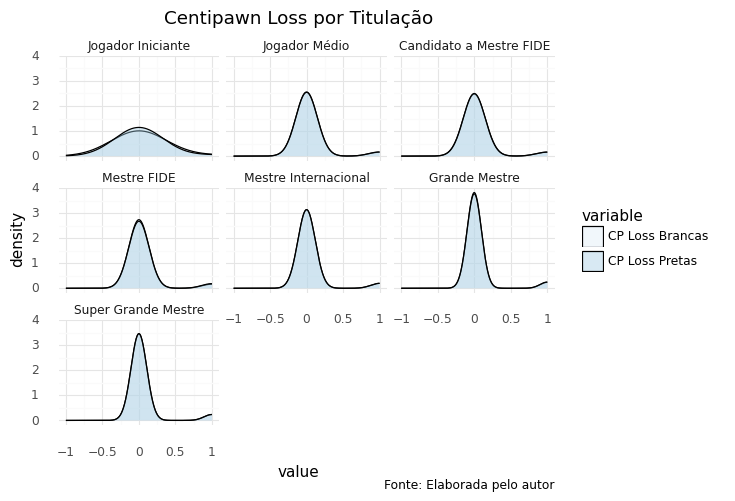

<ggplot: (194003086033)>

In [26]:

long_cp.apply(lambda x: pandas.to_numeric(x) if x.name == "value" else x).pipe(
    lambda _: ggplot(_, aes(x="value"))
    + geom_density(aes(fill="variable"), alpha=0.4)
    + facet_wrap("Label")
    + xlim(-1, 1)
    + labs(
                title="Centipawn Loss por Titulação",
                caption="Fonte: Elaborada pelo autor",
            )
    + theme_minimal()
    + scale_fill_brewer()
)

<font size=4>**8. TOP 10 JOGADORES DO MUNDO**

<font size=4>Vale também uma menção especial para os dez melhores jogadores do mundo, de acordo com o sistema de Rating Elo. O gráfico abaixo mostra quem são eles, por nomes e Rating.

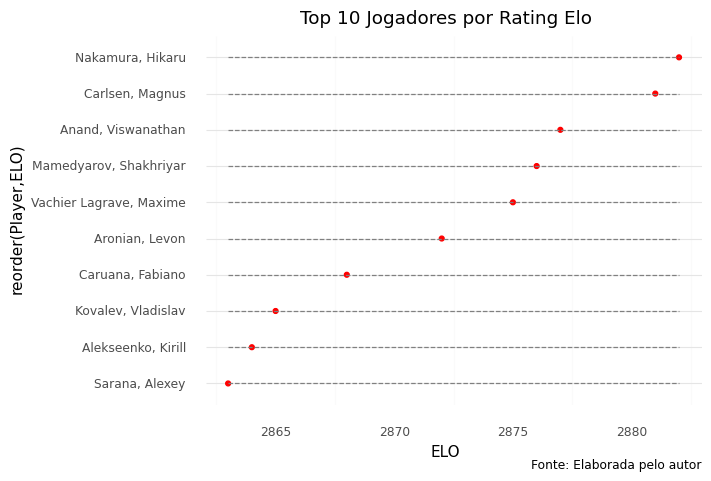

<ggplot: (193994672978)>

In [27]:
n = 10

topn = pandas.DataFrame(
    {
        "Player": data.filter(["White Name", "Black Name", "black_elo", "white_elo"])
        .melt(
            id_vars=["White Name", "Black Name"], value_vars=["white_elo", "black_elo"]
        )
        .sort_values(by="value", ascending=False)["White Name"]
        .unique()[0:10],
        "ELO": data.filter(["White Name", "Black Name", "black_elo", "white_elo"])
        .melt(
            id_vars=["White Name", "Black Name"], value_vars=["white_elo", "black_elo"]
        )
        .sort_values(by="value", ascending=False)["value"]
        .unique()[0:10],
        "Ranking (ELO)": numpy.arange(1, n + 1),
    }
)
(
    topn.pipe(lambda _: ggplot(_, aes(y="ELO", x="reorder(Player,ELO)")))
    + geom_point(colour="red")
    + geom_segment(
        aes(x="Player", xend="Player", y=min(topn["ELO"]), yend=max(topn["ELO"])),
        linetype="dashed",
        size=0.5,
        colour="grey",
    )
    + coord_flip()
    + theme_minimal()
    + theme(panel_grid_major_x=element_blank())
    + labs(title="Top 10 Jogadores por Rating Elo", caption="Fonte: Elaborada pelo autor")
)

<font size=4>Olhando para os indicadores de precisão e consistência dos dez melhores jogadores de xadrez do mundo, e comparando com o restante das categorias de jogadores na tabela do item 7.4, é possível perceber algumas coisas: todos eles se enquadram nos níveis de Centipawn médio equivalente aos Grandes Mestres e Super Grande Mestres, mas é visível que o que os diferenciam de fato é a consistência de suas jogadas. Aqui, o que tem o pior desvio padrão de Centipawn Loss é o sétimo melhor jogador do mundo, e seu valor é de 25 com as peças pretas. Esse número é muito inferior aos 48 dos Super Grande Mestres, sem contar que a maioria desses top 10 jogadores apresentam o desvio padrão igual ou menor que 20, com ambas as cores de peças.

Portanto, em suma, acima de um certo nível todos os jogadores são muito precisos, mas o que diferencia o grupo seleto de melhores do mundo dos demais é a consistência com que eles jogam as partidas, apresentando baixos níveis de Centipawn Loss recorrentemente.

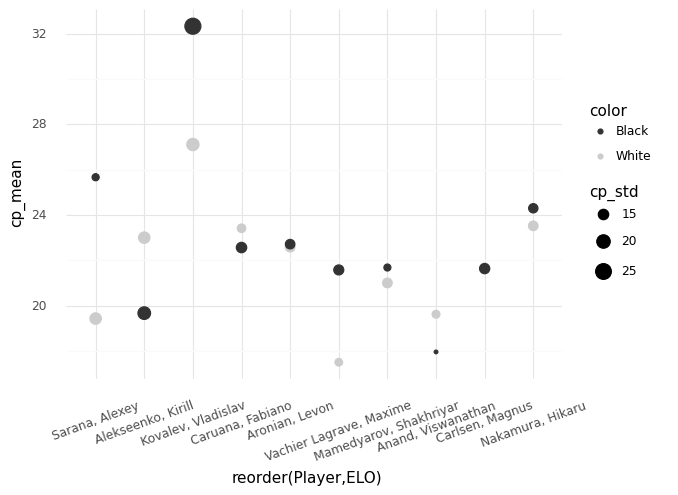

<ggplot: (194003563448)>

In [28]:
pandas.concat(
    [
        data[data["White Name"].isin(list(topn["Player"]))]
        .filter(["White Name", "White Av CP Loss"])
        .groupby("White Name")
        .agg(
            cp_mean=("White Av CP Loss", numpy.mean),
            cp_std=("White Av CP Loss", numpy.std),
        )
        .assign(color="White")
        .merge(topn, left_index=True, right_on="Player")
        .sort_values("Ranking (ELO)"),
        data[data["Black Name"].isin(list(topn["Player"]))]
        .filter(["Black Name", "Black Av CP Loss"])
        .groupby("Black Name")
        .agg(
            cp_mean=("Black Av CP Loss", numpy.mean),
            cp_std=("Black Av CP Loss", numpy.std),
        )
        .assign(color="Black")
        .merge(topn, left_index=True, right_on="Player")
        .sort_values("Ranking (ELO)"),
    ]
).pipe(
    lambda _: ggplot(
        _, aes(y="cp_mean", x="reorder(Player,ELO)", color="color", size="cp_std")
    )
    + geom_point()
    + theme_minimal()
    + scale_color_grey()
    + theme(axis_text_x=element_text(angle=20))
)

In [29]:
pandas.concat(
    [
        data[data["White Name"].isin(list(topn["Player"]))]
        .filter(["White Name", "White Av CP Loss"])
        .groupby("White Name")
        .agg(
            cp_mean=("White Av CP Loss", numpy.mean),
            cp_std=("White Av CP Loss", numpy.std),
        )
        .assign(color="White")
        .merge(topn, left_index=True, right_on="Player"),
        data[data["Black Name"].isin(list(topn["Player"]))]
        .filter(["Black Name", "Black Av CP Loss"])
        .groupby("Black Name")
        .agg(
            cp_mean=("Black Av CP Loss", numpy.mean),
            cp_std=("Black Av CP Loss", numpy.std),
        )
        .assign(color="Black")
        .merge(topn, left_index=True, right_on="Player"),
    ]
).sort_values("Ranking (ELO)")

,cp_mean,cp_std,color,Player,ELO,Ranking (ELO)
0,24.296774,13.668734,Black,"Nakamura, Hikaru",2882,1
0,23.521019,13.963870,White,"Nakamura, Hikaru",2882,1
1,21.670194,13.726076,White,"Carlsen, Magnus",2881,2
1,21.631970,14.711827,Black,"Carlsen, Magnus",2881,2
2,19.617021,12.262621,White,"Anand, Viswanathan",2877,3
2,17.954545,10.525616,Black,"Anand, Viswanathan",2877,3
3,21.680851,11.611663,Black,"Mamedyarov, Shakhriyar",2876,4
3,21.000000,14.050928,White,"Mamedyarov, Shakhriyar",2876,4
4,17.500000,12.083857,White,"Vachier Lagrave, Maxime",2875,5
4,21.574074,14.522074,Black,"Vachier Lagrave, Maxime",2875,5


<font size=4>**9. MODELO**

In [30]:
# White or Black

black_values = (
    data.melt(
        value_vars=["CP Loss Brancas"],
    )
    .explode("value")
    .reset_index()
    .rename(columns={"index": "game_number"})
    .groupby("game_number")
    .agg(mean=("value", numpy.mean), std=("value", numpy.std))
)

black_filter = (
    data.reset_index()
    .rename(columns={"index": "game_number"})
    .filter(["btwdiff", "Moves", "black_elo"])
    .assign(color="black")
    .rename(columns={"btwdiff": "diff", "black_elo": "elo"})
)


white_values = (
    data.melt(
        value_vars=["CP Loss Pretas"],
    )
    .explode("value")
    .reset_index()
    .rename(columns={"index": "game_number"})
    .groupby("game_number")
    .agg(mean=("value", numpy.mean), std=("value", numpy.std))
)

white_filter = (
    data.reset_index()
    .rename(columns={"index": "game_number"})
    .filter(["wtbdiff", "Moves", "white_elo"])
    .assign(color="white")
    .rename(columns={"wtbdiff": "diff", "white_elo": "elo"})
)


model_df = pandas.concat(
    [
        pandas.merge(black_values, black_filter, left_index=True, right_index=True),
        pandas.merge(white_values, white_filter, left_index=True, right_index=True),
    ]
)

In [51]:
import statsmodels.api as sm

model_df = model_df[model_df["std"].notna()]
model_df["color"] = numpy.where(model_df["color"] == "black", 1, 0)

X = model_df[["mean", "std"]]
y = model_df["elo"]



X2 = sm.add_constant(X['std'])
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    elo   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     560.1
Date:                Sun, 20 Nov 2022   Prob (F-statistic):          3.22e-122
Time:                        23:43:50   Log-Likelihood:            -1.4196e+05
No. Observations:               20814   AIC:                         2.839e+05
Df Residuals:                   20812   BIC:                         2.839e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2575.8741      2.499   1030.567      0.0

Primeiramente, a partir do modelo de regressão linear multipla com _mean_, que representa a média do Centipawn Loss para aquela partida, e _std_ que representa o desvio padrão da medida, ambas como variáveis explicativas para a variável dependente _ELO_. Resultando nos seguintes coeficientes:


$$ELO = 2660  -2.88 mean + 0.18 std $$


Lembrando que Centipawn Loss mede a distância de uma jogada em relação a jogada dada por uma engine, a média deve representar a qualidade do jogo como um todo em comparação as decisões tomadas a partir da avaliação, que leva em conta até 20 rodadas no futuro, dos algoritmos de Deep Learning utilizados pelas engines. 
Assim, um coeficiente negativo implica que uma perfomance mais próxima da engine, ou seja, um menor Centipawn Loss, é sinal de um jogador de maior ELO, o que corrobora as interpretações feitas durante o trabalho a partir das análise dos dados.
Porém, o desvio padrão traz um relacionamento positivo inesperado, pois significaria que jogadores de maior ELO possuem maior variância em termos de Centipawn Loss, ou seja, são mais inconsistentes, durante o jogo.
Levanta-se a hipotése que há variáveis externas que não estão sendo consideradas que impactam essa relação, e que devem ser incluidas no modelo para aprimorar as estimativas dos coeficientes. O que fica ainda mais claro, considerando que $R^2 = 0.038$.
Ou seja, apenas 3.8% da variância dos dados estão sendo explicados pelo modelo atual.

In [44]:
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os



X = model_df [['mean','diff','Moves','std','color']]
y = model_df['elo']



X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    elo   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     2373.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:42:08   Log-Likelihood:            -1.3833e+05
No. Observations:               20814   AIC:                         2.767e+05
Df Residuals:                   20809   BIC:                         2.767e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2613.5483      4.305    607.085      0.0

c:\Users\Vitor Russomano\flask-api\venv\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars


A partir da inclusão das variáveis _color_, que é uma dummy, assumindo o valor de 1 para indicar preto e 0 para indicar branco, assim como _diff_ que indica a diferença de rating entre os jogadores e _Moves_ como medida de duração, em termos de jogadas, da partida, eleva-se o r-squared, ou seja, houve um aprimoramento da capacidade do modelo em explicar a variável dependente, mais especificamente, tem-se que $R^2=0.33$.
Nota-se que todas as variáveis são de fato significantes considerando um $alpha=0.05$. 

Quanto a análise dos coeficientes, as interpretações anteriores se mantêm, _mean_ ainda apresenta uma relação negativa com _ELO_, enquanto _std_ é positivamente relacionado com a variável explicativa. Na realidade, a relação do desvio padrão do Centipawn Loss foi enaltecido com a adição de variáveis, o que é surpreendente, considerando que as análises anteriores indicavam que melhores jogadores eram mais consistentes durante a partida.

Porém, mesmo após a adição de variáveis, ainda é limitado a capacidade explicativa do modelo, e algumas relações não são claras, como por exemplo _std_, o que implica a necessidade de buscar mais dados que possam suportar a criação de modelos mais complexos.


### Um pouco sobre engines

'Chess engines' estão presentes desde 1950's, porém, houve grandes evoluções, sejam em termos de capacidade de processamento, que permite avaliar milhões de possibilidades por segundo atualmente, ou na técnicas por trás das 'engines', que atualmente as tornam superiores aos melhores jogadores do mundo.


Até 1970 e a concepção da AlphaZero, a engenharia comum entre as engines era baseada em um `depth-first-search` do jogo, ou seja, toda combinação sequencial de movimentos era avaliada a partir da posição atual, basicamente, um método bruto de pesquisa. A partir disso, seria avaliado os resultados finais, olhando para um número fixo de jogadas para frente, ou seja, no `node terminal` da árvore, e a partir dai, um algoritmo heurístico toma conta, avaliando de forma retroativa aquela posição, considerando todos os resultados posteriores, ou seja, irá retrocredendo para a posição atual, graduamente, e avaliando aquele ponto a partir do melhor resultado possível a partir daquela posição. Essa é, de forma muito sintética, a ideia por trás dos algoritmmos aplicados na maioria das engines.

Porém, AlphaZero é uma `neural network` que permite direcionar os esforços computacionais, ao limitar o número de possibilidades avaliadas, mas cada uma delas em mais profunidade, o que a permitiu se tornar a `engine` mais forte do mundo em 2019. Em mais profunidade, em cada jogada, um número de simulções é rodado, em que o algoritmo joga contra si mesmo para avaliar os movimentos que resultam nas melhores posições no futuro, avaliada em termos de 'produtividade' que é medido a partir da ideia de que o movimento precisa possuir um resultado histórico suficientemente bom para ser explorado, mas ao mesmo tempo inovador, para que haja alguma informação para ser extraida.

Embora essa seja uma curta introdução de engines, fica claro que embora sua história seja longa, nos últimos anos houve uma grande mudança nas ideias por trás dos algoritmos, e que provavelmente os próximos anos também se seguirão com ainda mais avanços, e será interessante presenciar que os gaps entre os jogadores e as `engines` se tornarão ainda maiores. 